# Seismic Signal Notebook (zeromq)

In [1]:
ipadress = "192.168.178.41"
port = "12345"

In [21]:
import zmq
import pandas
import struct
import pandas as pd
from tqdm.notebook import tqdm

context = zmq.Context()
socket = context.socket(zmq.SUB)

socket.connect(addr=f"tcp://{ipadress}:{port}")

socket.setsockopt_string(zmq.SUBSCRIBE, "")

print("Collecting updates from geod server...")

values = []
values_count = range(0, 200000)
with tqdm(total=len(values_count)) as pbar:
    for i in values_count:
        tmp = socket.recv()
        values.append(struct.unpack('ddd', tmp))
        
        pbar.update(1)
        
df = pd.DataFrame(data=values, columns=["A0", "A1","A2"])

df

  0%|          | 0/200000 [00:00<?, ?it/s]

,A0,A1,A2
0,-0.000042,1.615193e-04,0.000119
1,-0.000038,2.024789e-04,0.000106
2,-0.000028,2.477505e-04,0.000095
3,-0.000020,2.715271e-04,0.000090
4,-0.000009,1.862645e-08,0.000090
...,...,...,...
199995,-0.000069,2.567284e-04,0.000077
199996,0.000037,2.323650e-04,0.000116
199997,-0.000038,2.198667e-04,0.000158
199998,-0.000076,1.943205e-04,-0.000005


<AxesSubplot:>

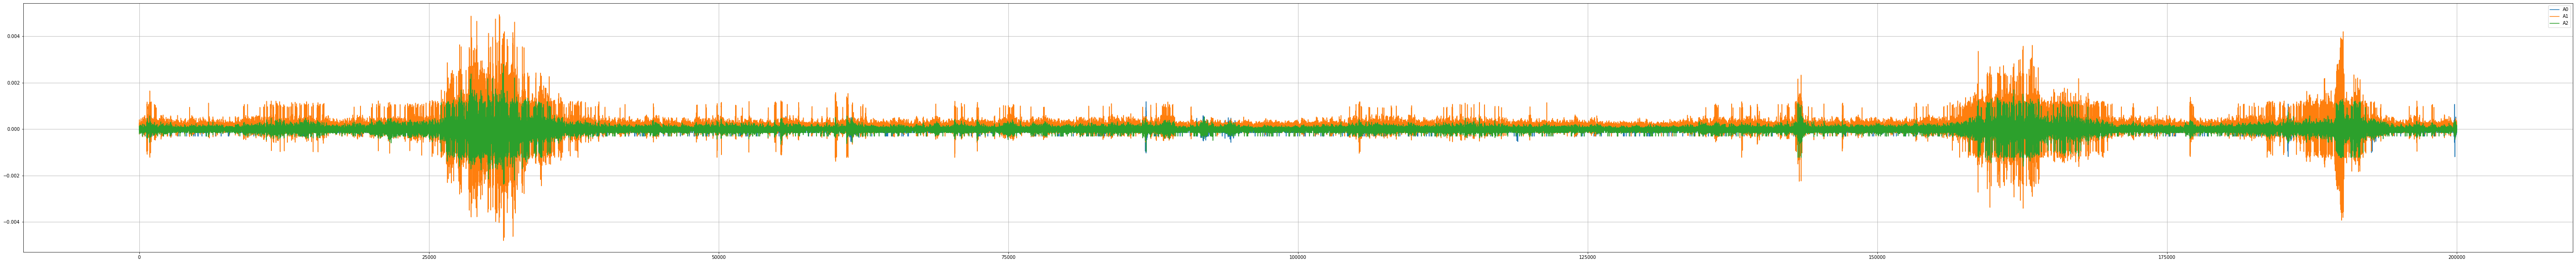

In [22]:
df[['A0','A1','A2']].plot(figsize=[100,10], grid=True)

<AxesSubplot:>

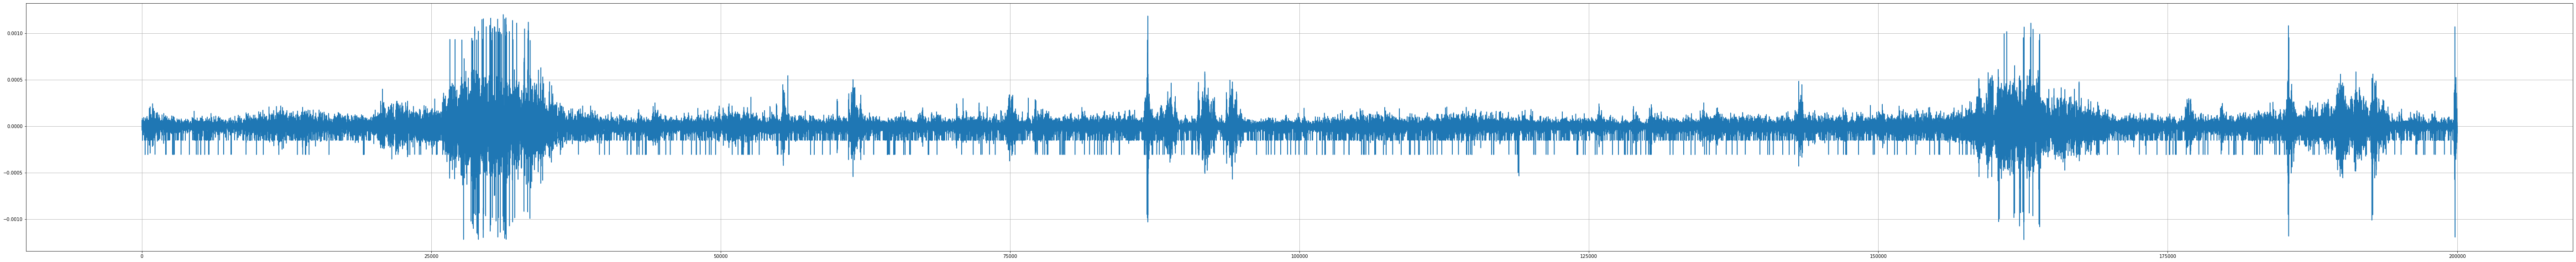

In [23]:
df['A0'].plot(figsize=[100,10], grid=True)

<AxesSubplot:>

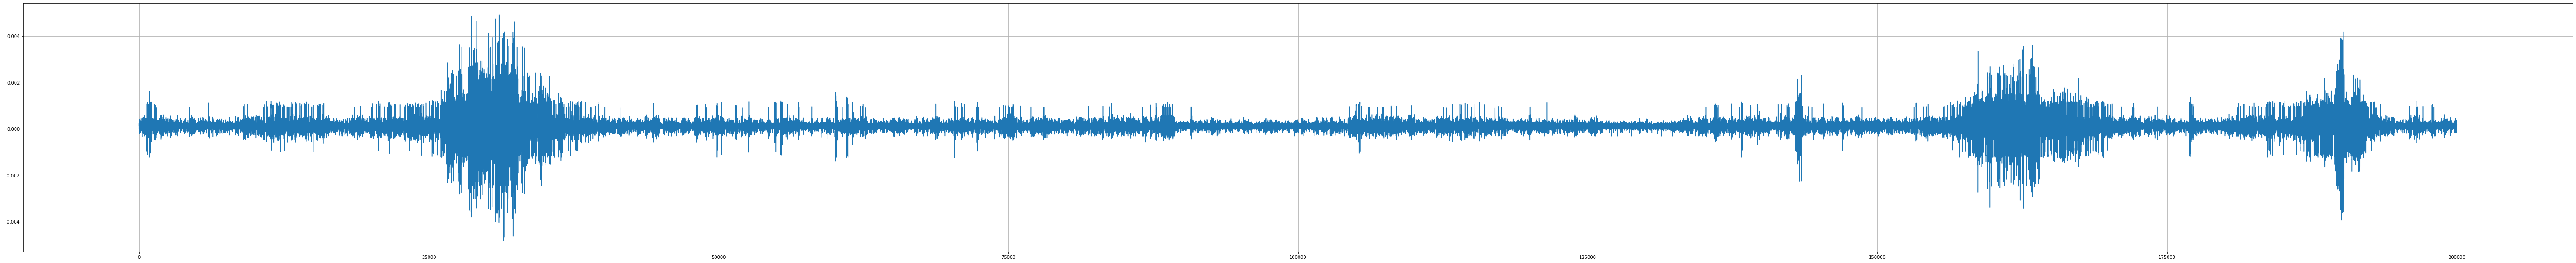

In [24]:
df['A1'].plot(figsize=[100,10], grid=True)

<AxesSubplot:>

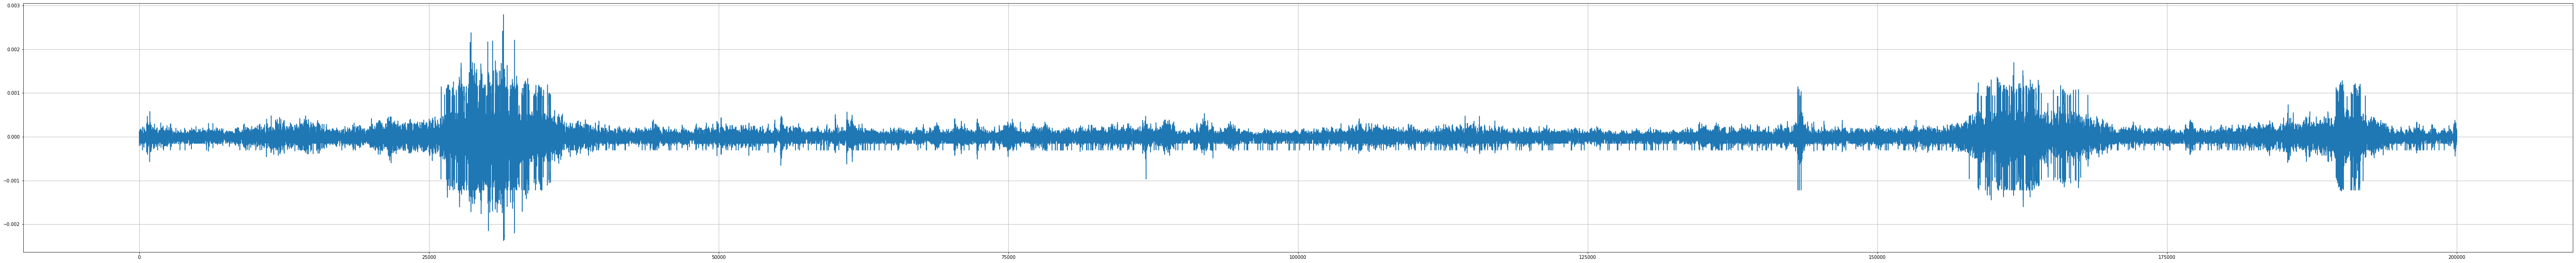

In [25]:
df['A2'].plot(figsize=[100,10], grid=True)